# **<font color="#ff5653">Exploratory Data Analysis</font>**


In [1]:
# Libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# Cargamos dataframe df_f1yf2
df_f1yf2 = pd.read_parquet("C:/Users/hpiza/Desktop/Subir a GitHub/Proyecto_individualDS-1/3_Datasets/df_f1yf2.parquet")

In [19]:
df_f1yf2

,user_id,año_lanzamiento,genres,playtime_forever
0,--000--,2006,"[Indie, Simulation]",1850.0
1,--000--,2009,[Action],5329.0
2,--000--,2010,"[Action, Free to Play, Indie]",66.0
3,--000--,2011,"[Action, Adventure, Indie, RPG, Action, Free t...",15564.0
4,--000--,2012,"[Action, Adventure, Casual, Indie, RPG, Action...",118326.0
...,...,...,...,...
660198,zzzmidmiss,2010,"[Action, Free to Play, Indie, Adventure, Strat...",1237.0
660199,zzzmidmiss,2011,"[Action, Free to Play, Massively Multiplayer, ...",2514.0
660200,zzzmidmiss,2012,"[Action, Adventure, Action, Free to Play, Indi...",14467.0
660201,zzzmidmiss,2013,"[Action, Adventure, Indie, RPG, Action, Free t...",423.0


In [12]:
# Cargamos dataframe df_f3f4yf5
df_f3f4yf5 = pd.read_parquet("C:/Users/hpiza/Desktop/Subir a GitHub/Proyecto_individualDS-1/3_Datasets/df_f3f4yf5.parquet")

In [20]:
df_f3f4yf5

,item_id,title,año_lanzamiento,genres,user_id,playtime_forever,recommend,analisis_sentimiento,año_publicado
0,10.0,Counter-Strike,2000,['Action'],71251241,566.0,True,2,2015
1,10.0,Counter-Strike,2000,['Action'],76561198015886143,144786.0,True,1,2015
2,10.0,Counter-Strike,2000,['Action'],76561198040188061,3895.0,True,2,2011
3,10.0,Counter-Strike,2000,['Action'],76561198072207162,54.0,True,2,2014
4,10.0,Counter-Strike,2000,['Action'],76561198076217855,3848.0,True,2,2014
...,...,...,...,...,...,...,...,...,...
39144,521430.0,Super Switch,2016,['Indie'],76561198075141715,5.0,True,2,2016
39145,521570.0,You Have 10 Seconds 2,2016,"['Casual', 'Free to Play', 'Indie']",76561198071122396,25.0,True,0,2016
39146,521570.0,You Have 10 Seconds 2,2016,"['Casual', 'Free to Play', 'Indie']",TfhuAWGscvg,54.0,True,0,2016
39147,521990.0,Galactic Storm,2016,"['Action', 'Indie']",mikeyg74,16.0,True,2,2016


In [13]:
# Cargamos dataframe df_fml1
df_fml1 = pd.read_parquet("C:/Users/hpiza/Desktop/Subir a GitHub/Proyecto_individualDS-1/3_Datasets/df_f6_ml.parquet")

In [21]:
df_fml1

,item_id,title,tags
0,761140.0,Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim..."
1,643980.0,Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '..."
2,670290.0,Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu..."
3,767400.0,弹炸人2222,"['Action', 'Adventure', 'Casual']"
4,772540.0,Battle Royale Trainer,"['Action', 'Adventure', 'Simulation', 'FPS', '..."
...,...,...,...
29917,745400.0,Kebab it Up!,"['Action', 'Indie', 'Casual', 'Violent', 'Adve..."
29918,773640.0,Colony On Mars,"['Strategy', 'Indie', 'Casual', 'Simulation']"
29919,733530.0,LOGistICAL: South Africa,"['Strategy', 'Indie', 'Casual']"
29920,610660.0,Russian Roads,"['Indie', 'Simulation', 'Racing']"


### **1- Tiempo de juego por año de lanzamiento**

In [14]:
# variables
df_x = df_f1yf2.groupby("año_lanzamiento")["playtime_forever"].sum()

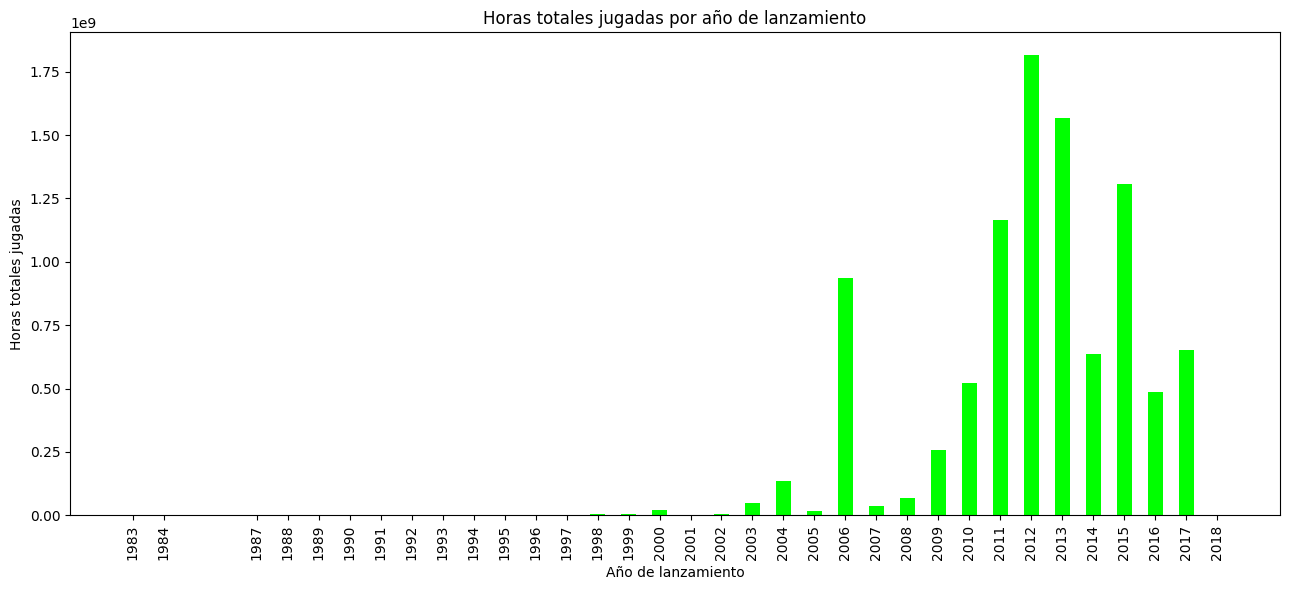

In [15]:
# Grafico de barras
plt.figure(figsize=(13, 6))
plt.bar(df_x.index, df_x.values, width=0.5, color="#00FF00")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Horas totales jugadas")
plt.title("Horas totales jugadas por año de lanzamiento")
plt.xticks(df_x.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

El grafico de barras nos muestra que los juegos que mas horas se jugaron fueron los lanzados en el año 2012, seguido de los lanzados en el año 2013 y 2015.

### **2- Analisis de sentimiento y total de horas jugadas**

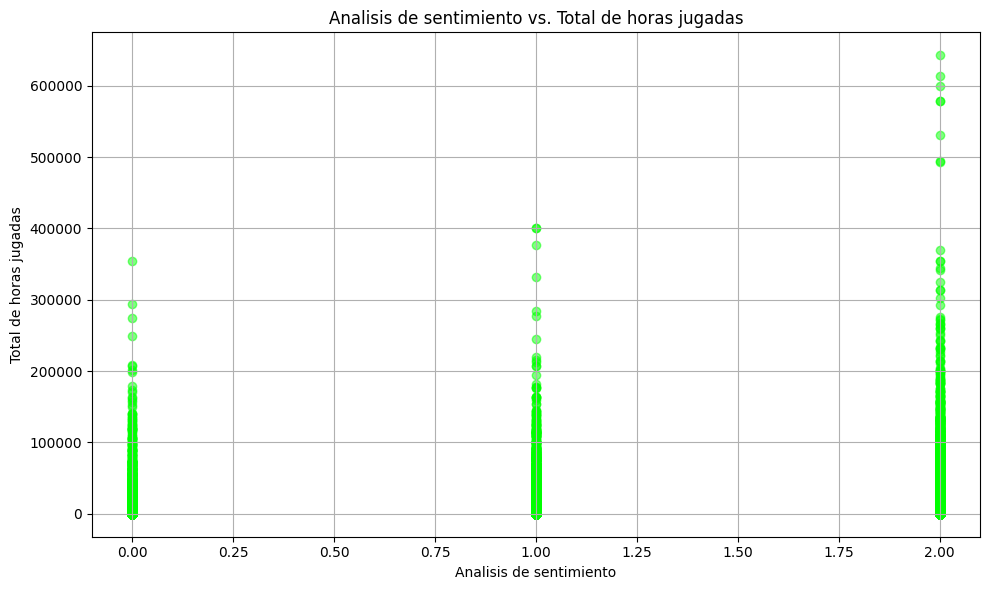

In [16]:
# Grafico de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(df_f3f4yf5["analisis_sentimiento"], df_f3f4yf5["playtime_forever"], alpha=0.5, color="#00FF00")
plt.xlabel("Analisis de sentimiento")
plt.ylabel("Total de horas jugadas")
plt.title("Analisis de sentimiento vs. Total de horas jugadas")
plt.grid(True)
plt.tight_layout()
plt.show()

Vemos en el grafico que mayor es el análisis de sentimiento (positivo), más usuarios juegan con mayor cantidad de tiempo.

### **3- Nubes de palabras**

In [17]:
# Dataframe
df_nubes_palabras = df_fml1

In [22]:
# Extraemos del dataframe la columna "title"
titles = df_nubes_palabras["title"]

In [23]:
# Creamos la nube de palabras
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(titles))

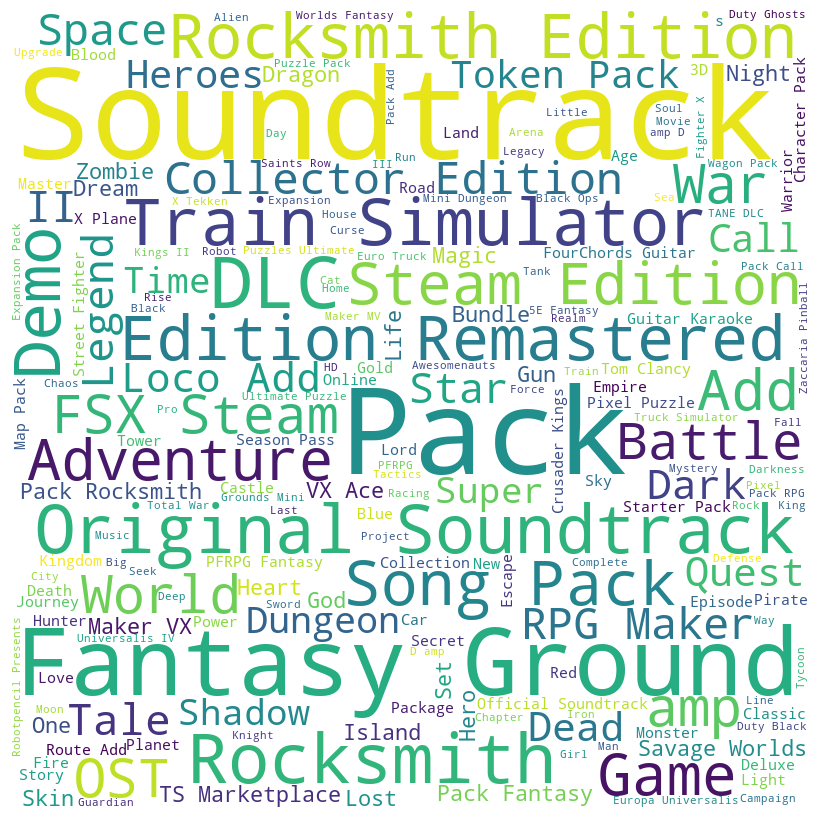

In [24]:
# Mostramos la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Las palabras que mas se repiten en los titulos de los videos juegos son:

- Soundtrack
- Pack
- Fantasy
- Ground